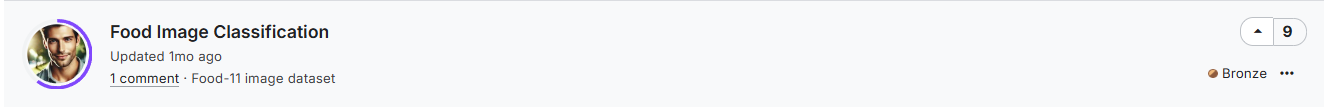

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2

import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
path_dir = r"D:\code_study\ML_CODE\dataSets\Classification\Food_11_image_dataset\archive"
path_dir = path_dir.replace("\\", "/")


In [3]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    shear_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    rotation_range = 25,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_dataset = train_datagen.flow_from_directory(
    path_dir + '/training',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
)

valid_dataset = valid_datagen.flow_from_directory(
    path_dir + '/validation',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
)

test_dataset = test_datagen.flow_from_directory(
    path_dir + '/evaluation',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
)

Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.
Found 3347 images belonging to 11 classes.


In [5]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(11, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x)

In [6]:
learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.3)

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [7]:
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=15, callbacks=[learning_rate])

Epoch 1/15
309/309 [==============================] - 75s 234ms/step - loss: 1.5542 - accuracy: 0.4965 - val_loss: 0.7612 - val_accuracy: 0.7539
Epoch 2/15
309/309 [==============================] - 72s 231ms/step - loss: 0.8812 - accuracy: 0.7057 - val_loss: 0.6360 - val_accuracy: 0.7977
Epoch 3/15
309/309 [==============================] - 72s 232ms/step - loss: 0.8080 - accuracy: 0.7405 - val_loss: 0.6017 - val_accuracy: 0.8085
Epoch 4/15
309/309 [==============================] - 70s 226ms/step - loss: 0.7341 - accuracy: 0.7644 - val_loss: 0.6214 - val_accuracy: 0.8012
Epoch 5/15
309/309 [==============================] - 70s 225ms/step - loss: 0.7462 - accuracy: 0.7634 - val_loss: 0.5521 - val_accuracy: 0.8245
Epoch 6/15
309/309 [==============================] - 70s 227ms/step - loss: 0.6819 - accuracy: 0.7761 - val_loss: 0.5803 - val_accuracy: 0.8207
Epoch 7/15
309/309 [==============================] - 70s 226ms/step - loss: 0.6597 - accuracy: 0.7928 - val_loss: 0.5744 - val_ac

In [8]:
model.save('fic.h5')

In [9]:
base_model.trainable = True
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5),
    metrics = ['accuracy']
)

In [10]:
history_tune = model.fit(train_dataset, validation_data=valid_dataset, epochs=25, callbacks=[learning_rate])

Epoch 1/25
309/309 [==============================] - 85s 267ms/step - loss: 1.3624 - accuracy: 0.6226 - val_loss: 0.5319 - val_accuracy: 0.8426
Epoch 2/25
309/309 [==============================] - 85s 275ms/step - loss: 0.7680 - accuracy: 0.7532 - val_loss: 0.5311 - val_accuracy: 0.8420
Epoch 3/25
309/309 [==============================] - 77s 251ms/step - loss: 0.6610 - accuracy: 0.7869 - val_loss: 0.5143 - val_accuracy: 0.8431
Epoch 4/25
309/309 [==============================] - 81s 262ms/step - loss: 0.5785 - accuracy: 0.8109 - val_loss: 0.4991 - val_accuracy: 0.8466
Epoch 5/25
309/309 [==============================] - 83s 266ms/step - loss: 0.5342 - accuracy: 0.8263 - val_loss: 0.4866 - val_accuracy: 0.8472
Epoch 6/25
309/309 [==============================] - 102s 330ms/step - loss: 0.4945 - accuracy: 0.8408 - val_loss: 0.4802 - val_accuracy: 0.8499
Epoch 7/25
309/309 [==============================] - 87s 281ms/step - loss: 0.4723 - accuracy: 0.8486 - val_loss: 0.4763 - val_a

In [11]:
model.save('fic_tuned.h5')

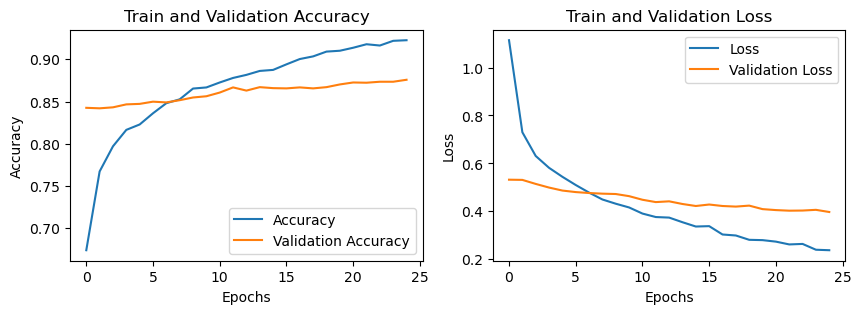

In [12]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.title('Train and Validation Accuracy')
plt.plot(history_tune.history['accuracy'], label='Accuracy')
plt.plot(history_tune.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Train and Validation Loss')
plt.plot(history_tune.history['loss'], label='Loss')
plt.plot(history_tune.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [13]:
result_train = model.evaluate(train_dataset)
result_val = model.evaluate(valid_dataset)

print('Train Dataset Accuracy: ', result_train[1])
print('Train Dataset Loss: ', result_train[0])
print('-' * 40)

print('Validation Dataset Accuracy: ', result_val[1])
print('Validation Dataset Loss: ', result_val[0])
print('-' * 40)

108/108 [==============================] - 7s 62ms/step - loss: 0.3970 - accuracy: 0.8758
Train Dataset Accuracy:  0.9630042314529419
Train Dataset Loss:  0.12230771034955978
----------------------------------------
Validation Dataset Accuracy:  0.8758017420768738
Validation Dataset Loss:  0.39702722430229187
----------------------------------------
